<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Откроем-файлы-и-изучим-их" data-toc-modified-id="Откроем-файлы-и-изучим-их-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Откроем файлы и изучим их</a></span></li><li><span><a href="#Изменение-типов-данных" data-toc-modified-id="Изменение-типов-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Изменение типов данных</a></span></li><li><span><a href="#Обработка-пропусков" data-toc-modified-id="Обработка-пропусков-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Обработка пропусков</a></span><ul class="toc-item"><li><span><a href="#Обработка-аномальных-значений" data-toc-modified-id="Обработка-аномальных-значений-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Обработка аномальных значений</a></span></li><li><span><a href="#Проверим-наличие-дубликатов" data-toc-modified-id="Проверим-наличие-дубликатов-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Проверим наличие дубликатов</a></span></li></ul></li></ul></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-2.0.2"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>Линейная регрессия</a></span></li><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-2.0.3"><span class="toc-item-num">2.0.3&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Градиентный-бустинг" data-toc-modified-id="Градиентный-бустинг-2.0.4"><span class="toc-item-num">2.0.4&nbsp;&nbsp;</span>Градиентный бустинг</a></span></li><li><span><a href="#Dummy-Regressor" data-toc-modified-id="Dummy-Regressor-2.0.5"><span class="toc-item-num">2.0.5&nbsp;&nbsp;</span>Dummy Regressor</a></span></li></ul></li></ul></li><li><span><a href="#Анализ-моделей" data-toc-modified-id="Анализ-моделей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ моделей</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Определение стоимости автомобилей

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

## Подготовка данных

### Откроем файлы и изучим их

In [1]:
import pandas as pd
import math
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.dummy import DummyRegressor
from sklearn.metrics import accuracy_score 
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
from scipy import stats as st
from numpy.random import RandomState
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import lightgbm as lgb

Установим RandomState

In [2]:
state = RandomState(12345) 

In [3]:
#Загрузим данные
data=pd.read_csv('autos.csv')
data.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [4]:
#Приведем название колонок к нижнему регистру
data.columns=data.columns.str.lower()
data.columns

Index(['datecrawled', 'price', 'vehicletype', 'registrationyear', 'gearbox',
       'power', 'model', 'kilometer', 'registrationmonth', 'fueltype', 'brand',
       'notrepaired', 'datecreated', 'numberofpictures', 'postalcode',
       'lastseen'],
      dtype='object')

In [5]:
#Переименуем колонки и посмотрим результат
data.rename(columns = {'datecrawled': 'date_crawled', 'vehicletype': 'vehicle_type','registrationyear':'registration_year','registrationmonth':'registration_month','fueltype':'fuel_type','notrepaired':'not_repaired','datecreated':'date_created','numberofpictures':'number_of_pictures','postalcode':'postal_code', 'lastseen': 'last_seen'}, inplace = True)
data.columns


Index(['date_crawled', 'price', 'vehicle_type', 'registration_year', 'gearbox',
       'power', 'model', 'kilometer', 'registration_month', 'fuel_type',
       'brand', 'not_repaired', 'date_created', 'number_of_pictures',
       'postal_code', 'last_seen'],
      dtype='object')

In [6]:
#Посмотрим численные данные
data.describe()

,price,registration_year,power,kilometer,registration_month,number_of_pictures,postal_code
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


1.В столбце 'price' ошибка - минимальная цена равно 0<br>
2.В столбце год регистрации максимальный год - 9999 <br>
3.В столбце 'power' есть автомобили с 0 л.с.<br>
4.В столбце 'registration_month' есть 0.<br>
5.В столбце number_of_pictures везде 0. Его можно удалить

In [7]:
#Удалим столблец number_of_pictures
data=data.drop(['number_of_pictures'],axis=1)

<div class="alert alert-block alert-success">
<b>Успех:</b> Данные загружены корректно, первичный осмотр проведен. Согласен, что константный признак нам не нужен.
</div>

### Изменение типов данных

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   date_crawled        354369 non-null  object
 1   price               354369 non-null  int64 
 2   vehicle_type        316879 non-null  object
 3   registration_year   354369 non-null  int64 
 4   gearbox             334536 non-null  object
 5   power               354369 non-null  int64 
 6   model               334664 non-null  object
 7   kilometer           354369 non-null  int64 
 8   registration_month  354369 non-null  int64 
 9   fuel_type           321474 non-null  object
 10  brand               354369 non-null  object
 11  not_repaired        283215 non-null  object
 12  date_created        354369 non-null  object
 13  postal_code         354369 non-null  int64 
 14  last_seen           354369 non-null  object
dtypes: int64(6), object(9)
memory usage: 40.6+ MB


<b><i>Колонки 'date_crawled', ' date_created , 'last_seen' имеют тип object. Нужно преобразовать в data</b></i>

In [9]:
data['date_crawled'] = pd.to_datetime(data['date_crawled'], format='%Y-%m-%d %H:%M:%S')
data['date_created'] = pd.to_datetime(data['date_created'], format='%Y-%m-%d %H:%M:%S')
data['last_seen'] = pd.to_datetime(data['last_seen'], format='%Y-%m-%d %H:%M:%S')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   date_crawled        354369 non-null  datetime64[ns]
 1   price               354369 non-null  int64         
 2   vehicle_type        316879 non-null  object        
 3   registration_year   354369 non-null  int64         
 4   gearbox             334536 non-null  object        
 5   power               354369 non-null  int64         
 6   model               334664 non-null  object        
 7   kilometer           354369 non-null  int64         
 8   registration_month  354369 non-null  int64         
 9   fuel_type           321474 non-null  object        
 10  brand               354369 non-null  object        
 11  not_repaired        283215 non-null  object        
 12  date_created        354369 non-null  datetime64[ns]
 13  postal_code         354369 no

### Обработка пропусков

In [10]:
data.isnull().mean().sort_values(ascending=False)

not_repaired          0.200791
vehicle_type          0.105794
fuel_type             0.092827
gearbox               0.055967
model                 0.055606
date_crawled          0.000000
price                 0.000000
registration_year     0.000000
power                 0.000000
kilometer             0.000000
registration_month    0.000000
brand                 0.000000
date_created          0.000000
postal_code           0.000000
last_seen             0.000000
dtype: float64

Пропуски в датасете в 4х столбцах: <br>
1.not_repaired - были машина в ремонте или нет<br>
2.vehicle_type - тип автомобильного кузова<br>
3.fuel_type-тип топлива<br>
4.gearbox- тип коробки передач<br>

In [11]:
#Попробуем найти зависимость столбца 'not_repaired' от других
data.loc[(data['not_repaired'].isnull()==False),['not_repaired','kilometer']].sort_values(by='kilometer', ascending=False)


,not_repaired,kilometer
177227,no,150000
211791,no,150000
211766,no,150000
211767,no,150000
211769,yes,150000
...,...,...
3721,no,5000
302469,no,5000
34401,no,5000
336638,no,5000


Была ли машина в ремонте:


no     247161
yes     36054
Name: not_repaired, dtype: int64

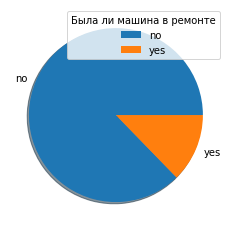

In [12]:
y=data['not_repaired'].value_counts()
print('Была ли машина в ремонте:')
display(y)
#y.index
plt.pie(y,labels = y.index,shadow = True)
plt.legend(title = "Была ли машина в ремонте")
#plt.figsize=[12,9]
plt.show() 

<b>Поскольку зависимости значения столбца 'not_repaired' от других установить не удалось, заполним его "заглушкой" - unknown_repairment</b>

Была ли машина в ремонте:


no                    247161
unknown_repairment     71154
yes                    36054
Name: not_repaired, dtype: int64

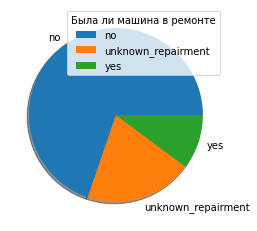

In [13]:
data['not_repaired'].fillna('unknown_repairment', inplace=True)
y=data['not_repaired'].value_counts()
print('Была ли машина в ремонте:')
display(y)

plt.pie(y,labels = y.index,shadow = True)
plt.legend(title = "Была ли машина в ремонте")

plt.show() 

In [14]:
data.isnull().mean().sort_values(ascending=False)

vehicle_type          0.105794
fuel_type             0.092827
gearbox               0.055967
model                 0.055606
date_crawled          0.000000
price                 0.000000
registration_year     0.000000
power                 0.000000
kilometer             0.000000
registration_month    0.000000
brand                 0.000000
not_repaired          0.000000
date_created          0.000000
postal_code           0.000000
last_seen             0.000000
dtype: float64

In [15]:
data.loc[data['model'].isnull(),'model']=data.loc[data['model'].isnull(),'brand']+'_unknown_model'

In [16]:
data.isnull().mean().sort_values(ascending=False)

vehicle_type          0.105794
fuel_type             0.092827
gearbox               0.055967
date_crawled          0.000000
price                 0.000000
registration_year     0.000000
power                 0.000000
model                 0.000000
kilometer             0.000000
registration_month    0.000000
brand                 0.000000
not_repaired          0.000000
date_created          0.000000
postal_code           0.000000
last_seen             0.000000
dtype: float64

In [17]:
data['gearbox'].fillna('unknown_gearbox', inplace=True)
data['vehicle_type'].fillna('unknown_vehicle_type', inplace=True)
data['fuel_type'].fillna('unknown_fuel_type', inplace=True)
data.isnull().mean().sort_values(ascending=False)

date_crawled          0.0
price                 0.0
vehicle_type          0.0
registration_year     0.0
gearbox               0.0
power                 0.0
model                 0.0
kilometer             0.0
registration_month    0.0
fuel_type             0.0
brand                 0.0
not_repaired          0.0
date_created          0.0
postal_code           0.0
last_seen             0.0
dtype: float64

#### Обработка аномальных значений

In [18]:
data.describe()

,price,registration_year,power,kilometer,registration_month,postal_code
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,99998.000000


Text(0.5, 1.0, 'Диаграмма размаха мощности в л.с.')

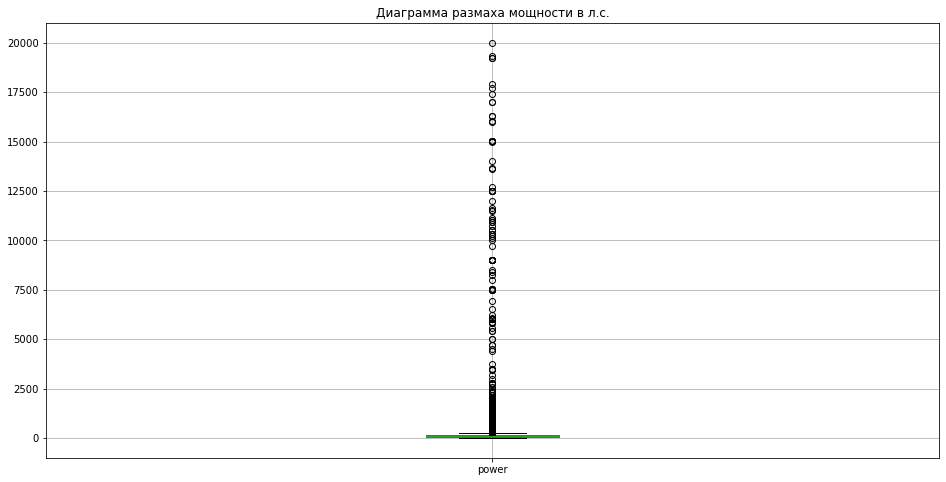

In [19]:
#Обработаем аномальные значения колонки power
data.boxplot(column='power',figsize = (16,8))
plt.title('Диаграмма размаха мощности в л.с.')

In [20]:
data_power=data.groupby('vehicle_type')[['power']].median()
data_power

,power
vehicle_type,
bus,110
convertible,122
coupe,148
other,85
sedan,116
small,64
suv,150
unknown_vehicle_type,61
wagon,131


In [21]:
def find_power(vehicle_type):
    "Берет тип кузова и возвращает медианную мощность в лошадиных силах"
    return data_power['power'][vehicle_type]

#Проверка
find_power('wagon')

131

In [22]:
data.loc[(data['power']>500),'power']=data.loc[(data['power']>500),'vehicle_type'].apply(find_power)

data.loc[(data['power']<20),'power']=data.loc[(data['power']<20),'vehicle_type'].apply(find_power)

In [23]:
#Посмотрим значения столбца power после преобразования
data.describe()

,price,registration_year,power,kilometer,registration_month,postal_code
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000
mean,4416.656776,2004.234448,116.449074,128211.172535,5.714645,50508.689087
std,4514.158514,90.227958,52.320166,37905.341530,3.726421,25783.096248
min,0.000000,1000.000000,20.000000,5000.000000,0.000000,1067.000000
25%,1050.000000,1999.000000,75.000000,125000.000000,3.000000,30165.000000
50%,2700.000000,2003.000000,110.000000,150000.000000,6.000000,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,71083.000000
max,20000.000000,9999.000000,500.000000,150000.000000,12.000000,99998.000000


Text(0.5, 1.0, 'Диаграмма размаха года регистрации')

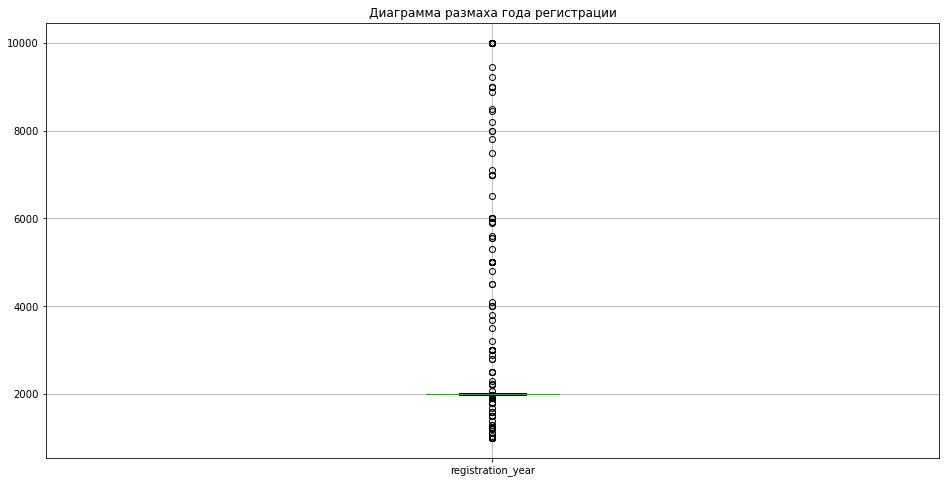

In [24]:
#Обработаем аномальные значения колонки power
data.boxplot(column='registration_year',figsize = (16,8))
plt.title('Диаграмма размаха года регистрации')

In [25]:
data['date_created'].sort_values()

61207    2014-03-10
4001     2015-03-20
342275   2015-06-18
86601    2015-08-07
175103   2015-08-10
            ...    
134418   2016-04-07
176987   2016-04-07
206303   2016-04-07
309336   2016-04-07
305430   2016-04-07
Name: date_created, Length: 354369, dtype: datetime64[ns]

Самая поздняя дата создания объявления - апрель 2016. Все что позже - ошибка. Заменим на медиану

In [26]:
print('Число количество строк с неправлиьным годом регитсрации автомобиля,\n к общему количеству строк в датасете:\n',data.query('registration_year >2019').shape[0]/data.shape[0])

Число количество строк с неправлиьным годом регитсрации автомобиля,
 к общему количеству строк в датасете:
 0.00029630131303810434


In [27]:
data.loc[(data['registration_year']>2016)|(data['registration_year']<1910),'registration_year']=data['registration_year'].median()


In [28]:
data.describe()

,price,registration_year,power,kilometer,registration_month,postal_code
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000
mean,4416.656776,2002.503549,116.449074,128211.172535,5.714645,50508.689087
std,4514.158514,6.944369,52.320166,37905.341530,3.726421,25783.096248
min,0.000000,1910.000000,20.000000,5000.000000,0.000000,1067.000000
25%,1050.000000,1999.000000,75.000000,125000.000000,3.000000,30165.000000
50%,2700.000000,2003.000000,110.000000,150000.000000,6.000000,49413.000000
75%,6400.000000,2007.000000,143.000000,150000.000000,9.000000,71083.000000
max,20000.000000,2016.000000,500.000000,150000.000000,12.000000,99998.000000


In [29]:
#Посмотрим что сделать с неправильным месяцем регистрации. Изучим какие вообще есть значений
set(data['registration_month'])

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

Есть все значения от 1 до 12, 0 лишний получается

In [30]:
data[['registration_month','date_crawled','date_created','last_seen']]

,registration_month,date_crawled,date_created,last_seen
0,0,2016-03-24 11:52:17,2016-03-24,2016-04-07 03:16:57
1,5,2016-03-24 10:58:45,2016-03-24,2016-04-07 01:46:50
2,8,2016-03-14 12:52:21,2016-03-14,2016-04-05 12:47:46
3,6,2016-03-17 16:54:04,2016-03-17,2016-03-17 17:40:17
4,7,2016-03-31 17:25:20,2016-03-31,2016-04-06 10:17:21
...,...,...,...,...
354364,7,2016-03-21 09:50:58,2016-03-21,2016-03-21 10:42:49
354365,1,2016-03-14 17:48:27,2016-03-14,2016-04-06 00:46:52
354366,3,2016-03-05 19:56:21,2016-03-05,2016-03-11 18:17:12
354367,3,2016-03-19 18:57:12,2016-03-19,2016-04-07 07:15:26


<b><i>Связать месяц регистрации с другими данными мы не можем. Будем считать что 0 это значение заглушка.</b></i>

<b><i>Посмотрим на зависимость цен автомобилей в зависимости от года регистрации</b></i>

In [31]:
price_year=data.pivot_table(index='registration_year', values = 'price', aggfunc = 'median')
#import plotly.graph_objs as go
#№fig = go.Figure()
#fig.add_trace(go.Scatter(x=price_year.index, y=price_year['price']))
#fig.show()

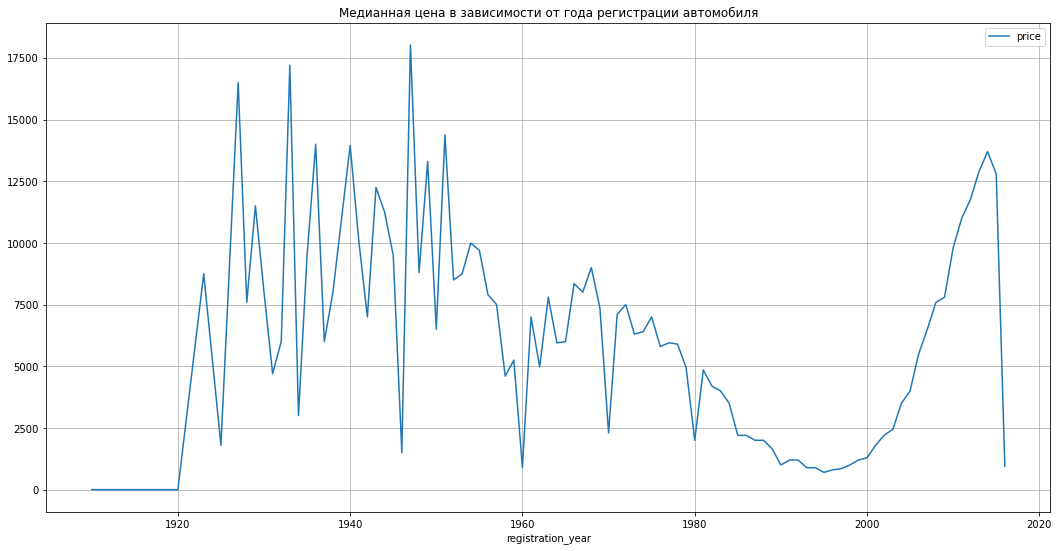

In [32]:
price_year.plot(grid=True, figsize = (18,9))
plt.title('Медианная цена в зависимости от года регистрации автомобиля')
plt.show()

<b><i>1.Есть нулевые значения, аномалии которые надо выкинуть.<br>2.Скорей всего до 1980 года мало данных, поэтому график ведет себя странно. <br>3.Чем выше год регистрации автомобиля, тем выше цена, что логично</b></i>

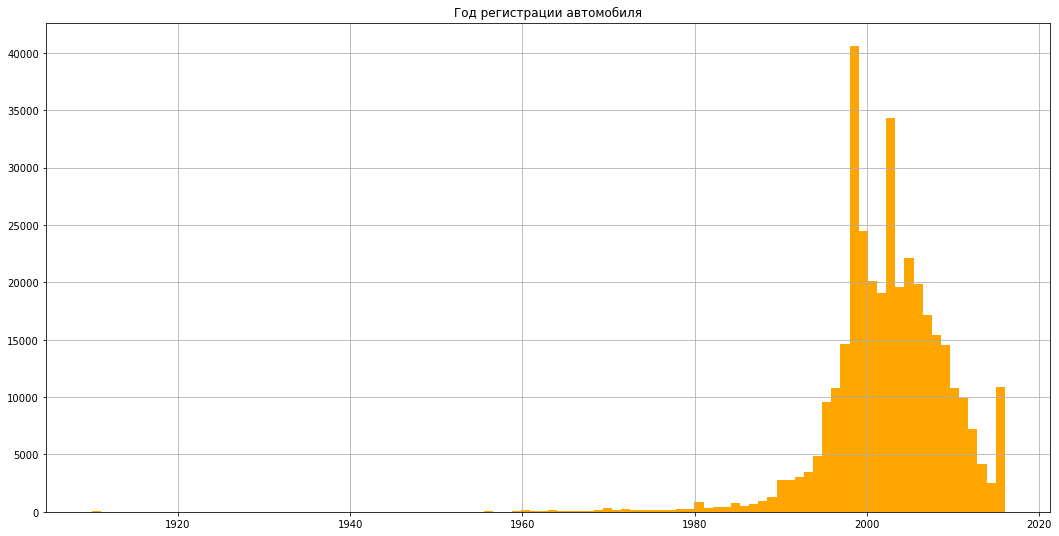

In [33]:
data['registration_year'].hist(figsize=(18,9), color='orange',bins=100)
plt.title('Год регистрации автомобиля')
plt.show()

<b><i>Видим, что до автомобилей годом регистрации старше 1980 года мало</b></i>

In [34]:
data.loc[data['price']==0].head()

,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,kilometer,registration_month,fuel_type,brand,not_repaired,date_created,postal_code,last_seen
7,2016-03-21 18:54:38,0,sedan,1980,manual,50,other,40000,7,petrol,volkswagen,no,2016-03-21,19348,2016-03-25 16:47:58
40,2016-03-26 22:06:17,0,unknown_vehicle_type,1990,unknown_gearbox,61,corsa,150000,1,petrol,opel,unknown_repairment,2016-03-26,56412,2016-03-27 17:43:34
111,2016-03-19 18:40:12,0,unknown_vehicle_type,2003,manual,61,golf,5000,12,petrol,volkswagen,unknown_repairment,2016-03-19,21698,2016-04-01 08:47:05
115,2016-03-20 18:53:27,0,small,1999,unknown_gearbox,64,volkswagen_unknown_model,5000,0,petrol,volkswagen,unknown_repairment,2016-03-20,37520,2016-04-07 02:45:22
152,2016-03-11 18:55:53,0,bus,2004,manual,101,meriva,150000,10,lpg,opel,yes,2016-03-11,27432,2016-03-12 23:47:10


Text(0.5, 1.0, 'Диаграмма размаха цены автомобиля')

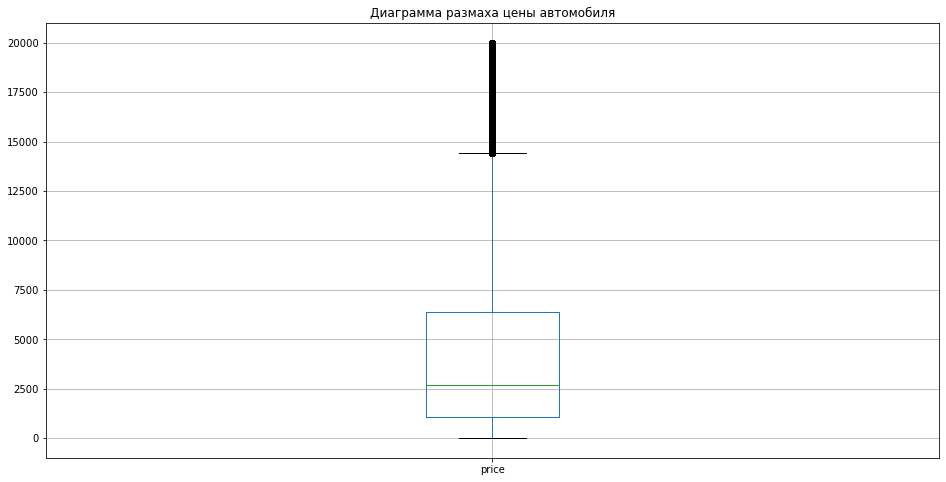

In [35]:
#Обработаем аномальные значения колонки power
data.boxplot(column='price',figsize = (16,8))
plt.title('Диаграмма размаха цены автомобиля')

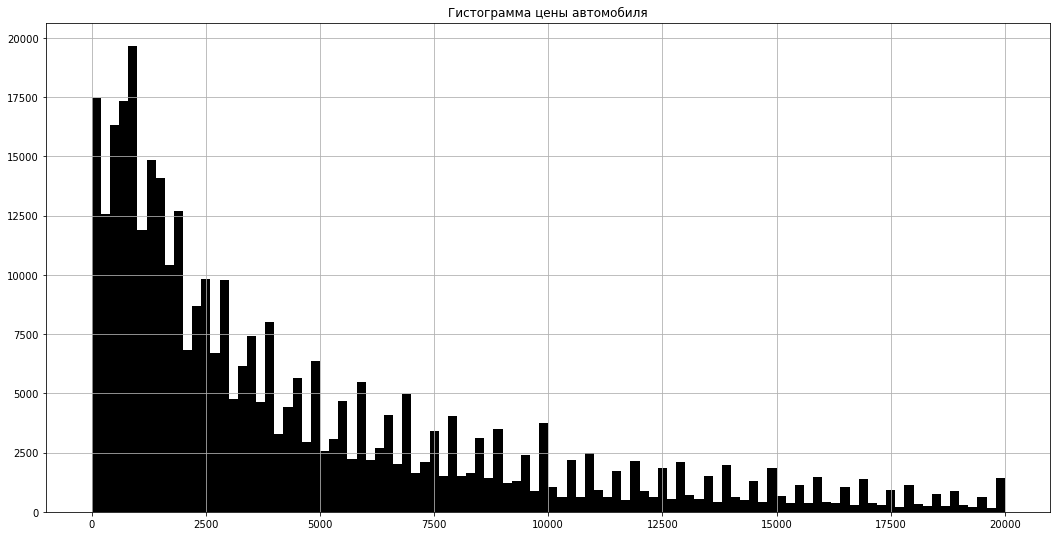

In [36]:
data['price'].hist(figsize=(18,9), color='black',bins=100)
plt.title('Гистограмма цены автомобиля')
plt.show()

<b><i>1.Гистограмма цены имеет обычный вид для ценовых предложений - чем выше цена, тем ниже число предложений.<br>2.Много значений цены "0", что нужно исправить.</b></i>

In [37]:
data_price=data.groupby('model')[['price']].median()
display(data_price.sample(10))

,price
model,
toyota_unknown_model,1999.0
calibra,1200.0
freelander,3999.0
almera,1300.0
omega,850.0
qashqai,12500.0
other,2550.0
e_klasse,4400.0
berlingo,2150.0


In [38]:
def find_price(model):
    "Берет тип модели автомобиля и возвращает медианную цену"
    return data_price['price'][model]
#Тест
find_price('yeti')

12945.0

In [39]:
data.loc[(data['price']<50),'price']=data.loc[(data['price']<50),'model'].apply(find_price)

In [40]:
data.describe()

,price,registration_year,power,kilometer,registration_month,postal_code
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000
mean,4510.071454,2002.503549,116.449074,128211.172535,5.714645,50508.689087
std,4464.544257,6.944369,52.320166,37905.341530,3.726421,25783.096248
min,50.000000,1910.000000,20.000000,5000.000000,0.000000,1067.000000
25%,1200.000000,1999.000000,75.000000,125000.000000,3.000000,30165.000000
50%,2840.000000,2003.000000,110.000000,150000.000000,6.000000,49413.000000
75%,6450.000000,2007.000000,143.000000,150000.000000,9.000000,71083.000000
max,20000.000000,2016.000000,500.000000,150000.000000,12.000000,99998.000000


<b><i>Столбец с выбросами по цене обработан</b></i>

#### Проверим наличие дубликатов

In [41]:
data.duplicated().sum()

4

In [42]:
#Удаляием полные дубликаты
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

## Обучение моделей

#### Подготовка данных

In [43]:
data_ohe = pd.get_dummies(data.drop(['price','date_crawled','date_created','last_seen'], axis=1), drop_first=True)
target = data['price']
features=data_ohe
features_train, features_valid, target_train, target_valid = train_test_split(
features, target, test_size=0.25, random_state=12345)
print('Размер обучающей выборки:', features_train.shape)
print('Размер валидационной выборки:', features_valid.shape)

Размер обучающей выборки: (265773, 352)
Размер валидационной выборки: (88592, 352)


In [44]:
scoring_metric='neg_mean_squared_error'

#### Линейная регрессия

In [45]:
%%time
model_lin_regr = LinearRegression()
model_lin_regr.fit(features_train, target_train)


Wall time: 4.32 s


LinearRegression()

In [46]:
%%time
predictions_valid_lin_regr = model_lin_regr.predict(features_valid)
print('RMSE for Linear_Regression = ', mean_squared_error(target_valid, predictions_valid_lin_regr)**0.5 )

RMSE for Linear_Regression =  2666.7496328102393
Wall time: 189 ms


#### Дерево решений

In [47]:
%%time
model_dtrgr = DecisionTreeRegressor(random_state=12345)
parameters = {'max_depth':range(1,15,1)}
rgr_rand_dec_tree=RandomizedSearchCV(model_dtrgr, parameters, cv=5, random_state=12345,scoring=scoring_metric,n_jobs=-1)
rgr_rand_dec_tree.fit(features_train, target_train)
print('Лучшие параметры: ',rgr_rand_dec_tree.best_params_)


Лучшие параметры:  {'max_depth': 14}
Wall time: 1min 39s


In [48]:
%%time
model_dtrgr = DecisionTreeRegressor(random_state=12345,max_depth=14)
model_dtrgr.fit(features_train,target_train)


Wall time: 9.12 s


DecisionTreeRegressor(max_depth=14, random_state=12345)

In [49]:
%%time
predictions_valid_dtrgr = model_dtrgr.predict(features_valid)
print('RMSE for  DecisionTreeRegressor = ', mean_squared_error(target_valid, predictions_valid_dtrgr)**0.5 )

RMSE for  DecisionTreeRegressor =  1963.9207101504542
Wall time: 152 ms


#### Градиентный бустинг

In [50]:
#Преобразуем параметры для градиентного бустинга.(без кодирования)
target_for_grad_boost = data['price']
features_for_grad_boost=data.drop(['price','date_crawled','date_created','last_seen'], axis=1)


In [51]:
#Сделаем столбцы с категориальными признкаами
categorial_columns=['vehicle_type','gearbox','model','fuel_type','brand','not_repaired']
features_for_grad_boost[categorial_columns].info()
features_for_grad_boost[categorial_columns]=features_for_grad_boost[categorial_columns].astype('category')
features_for_grad_boost[categorial_columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354365 entries, 0 to 354368
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   vehicle_type  354365 non-null  object
 1   gearbox       354365 non-null  object
 2   model         354365 non-null  object
 3   fuel_type     354365 non-null  object
 4   brand         354365 non-null  object
 5   not_repaired  354365 non-null  object
dtypes: object(6)
memory usage: 18.9+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 354365 entries, 0 to 354368
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   vehicle_type  354365 non-null  category
 1   gearbox       354365 non-null  category
 2   model         354365 non-null  category
 3   fuel_type     354365 non-null  category
 4   brand         354365 non-null  category
 5   not_repaired  354365 non-null  category
dtypes: category(6)
memory usage: 5

In [52]:
features_train_grad_boost, features_valid_grad_boost, target_train_grad_boost, target_valid_grad_boost = train_test_split(
features_for_grad_boost, target_for_grad_boost, test_size=0.25, random_state=12345)
print('Размер обучающей выборки:', features_train_grad_boost.shape)
print('Размер валидационной выборки:', features_valid_grad_boost.shape)

Размер обучающей выборки: (265773, 11)
Размер валидационной выборки: (88592, 11)


In [53]:
%%time
parameters = {'n_estimators':range(1,400,10), 'num_leaves':range(10,50,5)}
rgr_rand_frst=RandomizedSearchCV(lgb.LGBMRegressor(random_state=12345), parameters, cv=5, random_state=12345,scoring=scoring_metric,n_jobs=-1)
rgr_rand_frst.fit(features_train_grad_boost, target_train_grad_boost)
print('Лучшие параметры: ',rgr_rand_frst.best_params_)

Лучшие параметры:  {'num_leaves': 40, 'n_estimators': 291}
Wall time: 28.9 s


In [54]:
%%time
model_lgb=lgb.LGBMRegressor(random_state=12345,num_leaves= 40, n_estimators= 291)
model_lgb.fit(features_train_grad_boost,target_train_grad_boost)

Wall time: 1.47 s


LGBMRegressor(n_estimators=291, num_leaves=40, random_state=12345)

In [55]:
%%time
predictions_valid_lgbm=model_lgb.predict(features_valid_grad_boost)
print('RMSE for LGBM = ', mean_squared_error(target_valid_grad_boost, predictions_valid_lgbm)**0.5 )

RMSE for LGBM =  1640.282313157563
Wall time: 326 ms


#### Dummy Regressor

In [56]:
%%time
dummy_regressor = DummyRegressor(strategy="median") 
dummy_regressor.fit(features_train,target_train)

Wall time: 4.99 ms


DummyRegressor(strategy='median')

In [57]:
%%time
dummy_regressor_predictions=dummy_regressor.predict(features_valid)
print('RMSE for Dummy Regressor = ', mean_squared_error(target_valid, dummy_regressor_predictions)**0.5 )

RMSE for Dummy Regressor =  4750.939808701946
Wall time: 997 µs


## Анализ моделей


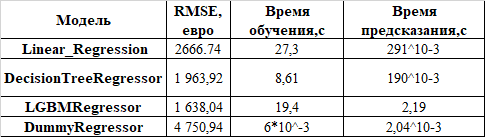

<b><i>1.Лучший показатель по RMSE - у LGBM Regressor. <br>
2.Лучший показатель по времени обучения - у Decision Tree Regressor.<br>
3.Худший показатель по времени предсказания -LGBM Regressor. Это видимо связано с тем что модель достаточно сложная.
 </b></i>